<a href="https://colab.research.google.com/github/adgregory/adsmovil/blob/main/CTR_Prueba_Tecnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='orange'>State of the Art</font>

1. Deep Interest Network for Click-Through Rate Prediction
https://sci-hub.hkvisa.net/10.1145/3219819.3219823

Features y modelos implementados

2. DataSet de Kaggle. Features implementados.
https://www.kaggle.com/c/avazu-ctr-prediction/overview

# <font color='orange'>Install required libraries</font>

In [2]:
%%capture
!pip install tensorflow_data_validation

# <font color='orange'>Libraries</font>

In [248]:
# General
import pandas as pd
import numpy as np
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_data_validation as tfdv
from sklearn import tree

# Encoding
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Tree models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Non linear models
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# DNN
import tensorflow as tf

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [165]:
# Set graphs style
sns.set_theme()

# <font color='orange'>Data Understanding, Cleaning and Preprocessing</font>

## <font color='green'>Data Visualization Helper Functions</font>

In [2]:
def plot_feature_histogram(tfdv_stats, ft_idx):
  '''
  Plot histogram of specific feature from TFDV object
  -----
  Args:
       tfdv_stats: TensorFlow Data Visualization Object
       ft_idx: Index used to return the required visualization data
  ----
  '''
  hist_df = pd.DataFrame(columns=['name', 'frequency'])
  for value in tfdv_stats.datasets[0].features[ft_idx].string_stats.top_values:
    hist_df = hist_df.append({'name': value.value, 'frequency': value.frequency}, ignore_index = True)

  # Graficar Feature Histogram
  ft_name = ctr_stats.datasets[0].features[ft_idx].path.step[0]
  sns.histplot(hist_df, x = 'name', y = 'frequency')
  plt.title(ft_name + ' feature histogram')
  plt.xticks(rotation=90)


## <font color='green'>Data Understanding</font>

In [100]:
# Read CSV file with dataset
ctr_df = pd.read_csv('Base_proyecto.csv')
ctr_df.head()

,id,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,platform_carrier,app_bundle,domain,clicks,impressions,ctr
0,1,FULLSCREEN,320x480,21,UNITY,WIFI,APP,-1,Other,UNKNOWN,6,29,0.206897
1,2,FULLSCREEN,320x480,23,UNITY,WIFI,APP,-1,com.wordgame.puzzle.board.es,UNKNOWN,13,86,0.151163
2,3,0,320x480,23,OPERA_MEDIA,CELL_3G,APP,Claro,com.jamendoandoutly.mainpakkage,UNKNOWN,0,11,0.000000
3,4,FULLSCREEN,320x480,23,MOPUB,CELL_4G,APP,Movistar,com.drilens.wamr,UNKNOWN,0,38,0.000000
4,5,0,320x480,5,OPERA_MEDIA,WIFI,APP,Movistar,com.jam.endo,UNKNOWN,0,19,0.000000


Teniendo en cuenta las columnas de 'clicks' e 'impressions', se realiza el calculo de 'ctr' y se corrobora que los valores dados de ctr (con precision de 16 decimales) concurden con la división establecida.

In [101]:
filtered_df = pd.DataFrame()
filtered_df['clicks'] = ctr_df['clicks']
filtered_df['impressions'] = ctr_df['impressions']

filtered_df['ctr_calculated'] = np.round(np.float64(filtered_df['clicks']/filtered_df['impressions']), 16)

In [102]:
filtered_df['comparision'] = list(filtered_df['ctr_calculated'] == ctr_df['ctr'])

In [103]:
filtered_df[filtered_df['comparision'] == False]

,clicks,impressions,ctr_calculated,comparision
11,2,65,0.030769,False
17,1,18,0.055556,False
18,3,287,0.010453,False
20,3,14,0.214286,False
33,4,110,0.036364,False
...,...,...,...,...
30712,3,7,0.428571,False
30772,3,7,0.428571,False
30871,3,7,0.428571,False
30898,3,7,0.428571,False


Since CTR = clicks/impressions, our model cannot use these features as inputs. Here the id columns is also deleted.

In [104]:
ctr_df.drop(columns = ['id', 'clicks', 'impressions'], inplace = True)

In [105]:
ctr_df.head()

,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,platform_carrier,app_bundle,domain,ctr
0,FULLSCREEN,320x480,21,UNITY,WIFI,APP,-1,Other,UNKNOWN,0.206897
1,FULLSCREEN,320x480,23,UNITY,WIFI,APP,-1,com.wordgame.puzzle.board.es,UNKNOWN,0.151163
2,0,320x480,23,OPERA_MEDIA,CELL_3G,APP,Claro,com.jamendoandoutly.mainpakkage,UNKNOWN,0.000000
3,FULLSCREEN,320x480,23,MOPUB,CELL_4G,APP,Movistar,com.drilens.wamr,UNKNOWN,0.000000
4,0,320x480,5,OPERA_MEDIA,WIFI,APP,Movistar,com.jam.endo,UNKNOWN,0.000000


Using TensorFlow Data Visualization tool, we can easily visualize all the data, basic statistics and missing values that may be important for the model.

<font color='RED'>IMPORTANT </font> : when exporting this script, the data visualization tool is not saved, therefore it will not be shown unless the script is compiled.

In [106]:
ctr_stats = tfdv.generate_statistics_from_dataframe(ctr_df)

# Visualization of Raw Data
tfdv.visualize_statistics(ctr_stats)

In [107]:
# Use an schema object to check categorical unique values and domain of every feature.
ctr_schema = tfdv.infer_schema(statistics=ctr_stats)
tfdv.display_schema(ctr_schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'ad_position',STRING,required,,'ad_position'
'ad_size',STRING,required,,'ad_size'
'hour_of_day_utc',INT,required,,-
'inventory_source',STRING,required,,'inventory_source'
'platform_bandwidth',STRING,required,,'platform_bandwidth'
'environment_type',STRING,required,,'environment_type'
'platform_carrier',STRING,required,,'platform_carrier'
'app_bundle',STRING,required,,'app_bundle'
'domain',STRING,required,,'domain'


,Values
Domain,
'ad_position',"'0', 'ABOVE_THE_FOLD', 'BELOW_THE_FOLD', 'FOOTER', 'FULLSCREEN', 'HEADER', 'POSITION_UNKNOWN'"
'ad_size',"'-1x-1', '160x600', '1x1', '250x250', '256x192', '300x100', '300x250', '300x480', '300x50', '300x600', '320x100', '320x480', '320x50', '320x568', '320x570', '336x280', '360x56', '360x592', '360x598', '360x640', '360x703', '370x58', '375x667', '400x824', '411x64', '412x790', '412x814', '414x736', '424x808', '480x320', '728x90', '768x1024'"
'inventory_source',"'APPNEXUS', 'CRITEO', 'GOOGLE_ADX', 'INMOBI', 'INNERACTIVE', 'MILLENNIAL', 'MOPUB', 'OPENX', 'OPERA_MEDIA', 'RICHAUDIENCE', 'RUBICON', 'SMARTADSERVER', 'TRIPLELIFT', 'UNITY', 'UNRULYX', 'VERVE'"
'platform_bandwidth',"'CELL_2G', 'CELL_3G', 'CELL_4G', 'CELL_UNKNOWN', 'CONNECTION_UNKNOWN', 'ETHERNET', 'UNKNOWN', 'WIFI'"
'environment_type',"'APP', 'UNKNOWN', 'WEB'"
'platform_carrier',"'-1', 'Avantel ', 'Claro', 'Movistar', 'Tigo'"
'app_bundle',"'1524620009', '1533452966', 'Other', 'UNKNOWN', 'air.com.aceviral.motox3m', 'air.com.jogatina.domino.android', 'aplicaciones.paleta.alterlegionanime', 'aplicaciones.paleta.legionanimeday', 'aplicaciones.paleta.legionanimefull', 'aplicaciones.paleta.legionanimexs', 'bubble.shooter.shooting.shoot.game', 'cjvg.santabiblia', 'cn.wps.moffice_eng', 'coloring.color.number.happy.paint.art.drawing.puzzle', 'com.LoopGames.Domino', 'com.TeryBit.TeryBit', 'com.app.romansl.skvishy', 'com.bigcool.puzzle.fruitgenies', 'com.callapp.contacts', 'com.cyberlink.youcammakeup', 'com.cyberlink.youperfect', 'com.digitalproshare.filmapp', 'com.dogs.nine', 'com.drilens.wamr', 'com.dropdom.blockpuzzle.hwwgame', 'com.dualspace.multispace.android', 'com.dvex.movp', 'com.filmlegacy.slupaf', 'com.finecameffect.fortyfunseven', 'com.firsttouchgames.dls7', 'com.firsttouchgames.hero2', 'com.firsttouchgames.smp', 'com.fugo.wow', 'com.fungameplus.smartrope', 'com.gameeapp.android.app', 'com.gammalab.chessopenings', 'com.hafert.ImposterAssassin', 'com.higgs.cubemaster3d', 'com.jam.endo', 'com.jamendoandoutly.mainpakkage', 'com.linkdesks.iBubble', 'com.ludashi.dualspace', 'com.mars.avgchapters', 'com.merge.cat.paradise', 'com.merge.cube.winner', 'com.mintgames.triplecrush.tile.fun', 'com.mobz.vd.in', 'com.mojang.minecraftvr', 'com.movinapp.dict.frde.free', 'com.movinapp.dict.french.free', 'com.movinapp.dict.frit.free', 'com.movinapp.facts.science', 'com.musicops.vanillamusicdownload', 'com.musicplayer.playermusic', 'com.olx.olx', 'com.rahul.videoderbeta', 'com.sanhe.clipclaps', 'com.snowcorp.stickerly.android', 'com.solitaire.spider.patience.ocean.aquarium', 'com.sukhavati.gotoplaying.bubble.BubbleShooter.mint', 'com.superbox.aos.fire2048', 'com.sweetfuirt.candy', 'com.tilemaster.puzzle.block.match', 'com.tripledot.woodoku', 'com.vs.bhaktiringtone', 'com.wordgame.puzzle.board.es', 'com.wordgame.puzzle.resort.story', 'com.zareklamy', 'el.tio', 'fast.phone.clean', 'fluffyslime.swoimi.rukami', 'futbol.play', 'games.spearmint.matchanimal', 'games.spearmint.triplecrush', 'link.merge.puzzle.onnect.number', 'mobi.mangatoon.comics.aphone.spanish', 'mobi.mangatoon.novel.portuguese', 'mod.craftgame.minigame', 'music.musicplayer', 'org.majestic.congratulation', 'phone.cleaner.speed.booster.cache.clean.android.master', 'tm.alarm.clock', 'tv.mxliptv.app', 'video.downloaderforinstagram.photodownloader.repost', 'videoeditor.videorecorder.screenrecorder', 'vmd.windowphotoeditor'"
'domain',"'Other', 'UNKNOWN', 'absolutelyconnected.com', 'ahoramismo.com', 'aminoapps.com', 'ask.fm', 'autogestionatusalud.com', 'b612.snow.me', 'bbc.com', 'bebesymas.com', 'bible.knowing-jesus.com', 'biggestchef.com', 'bigglobaltravel.com', 'callapp.com', 'cleverclassic.com', 'comedy.com', 'consejosytrucos.co', 'daquan.tv', 'dff3a14dc.app-ads-txt.com', 'docjournals.com', 'doctoreport.com', 'drama.fandom.com', 'drivepedia.com', 'easybrain.com', 'economipedia.com', 'elmundo.es', 'fandom.com', 'fifaindex.com', 'fortnitetracker.com', 'gameofglam.com', 'gardenmanage.com', 'gingerize.c

Teniendo en cuenta a la vizualizacion de los datos unicos categoricos presentes en el dataset, se presta atención principal a los siguientes features:


*   **platform_carrier**: Platform carrier has 5 possible values, among which there is '-1', which corresponds to the non-existence of the data in the dataset. This value corresponds to 51.7% of the total data. Therefore, the probability that the next data in production is unknown is higher than knowing any of the other 4 carriers presented (Avantel, Claro, Movistar Tigo).

*   **app_bundle**: Likewise, this feature has unknown values that represent ~71% of the total dataset.
*   **domain** Likewise, this feature has unknown values that represent ~90% of the total dataset.

To visualize this disproportion, we can see below a set of histograms showing the frequency of each value in the feature vector.


Analisis de **platform_carrier**

In [108]:
platform_carrier_unique_val = len(ctr_schema.string_domain[5].value)
print('Valores unicos de {}: {}'.format(ctr_schema.string_domain[5].name, platform_carrier_unique_val))

Valores unicos de platform_carrier: 5


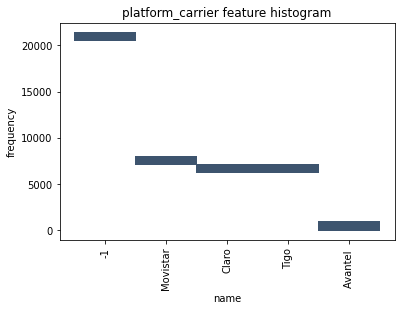

In [109]:
plot_feature_histogram(ctr_stats, ft_idx = 6)

Analisis de **app_bundle**

In [110]:
app_bundle_unique_val = len(ctr_schema.string_domain[6].value)
print('Valores unicos de {}: {}'.format(ctr_schema.string_domain[6].name, app_bundle_unique_val))

Valores unicos de app_bundle: 86


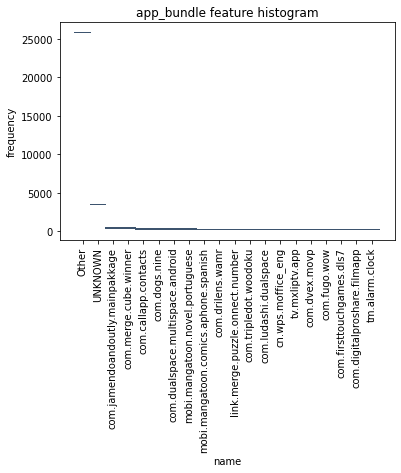

In [111]:
plot_feature_histogram(ctr_stats, ft_idx = 7)

Analisis de **domain**

In [112]:
domain_unique_val = len(ctr_schema.string_domain[7].value)
print('Valores unicos de {}: {}'.format(ctr_schema.string_domain[7].name,domain_unique_val))

Valores unicos de domain: 94


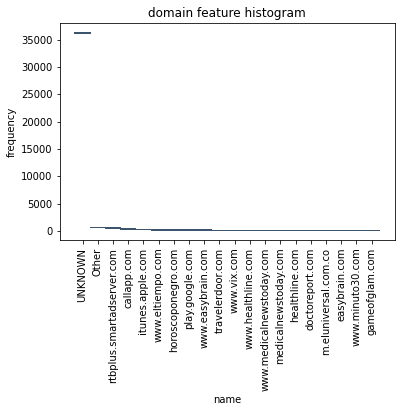

In [113]:
plot_feature_histogram(ctr_stats, ft_idx = 8)

In [114]:
def delete_unknown_from_list(df, feature, unknown_list):
  '''
  Helper function to delete unknown values from feature vector.
  -----
  Args:
       df: Pandas DataFrame.
       feature: feature name.
       unknown_list: list that contains unique unknown values
  -----
  Return:
         df: Subset of original DataFrame without unknown values
  '''
  
  for unknown in unknown_list:
    df = df[df[feature] != unknown]
  return df

Teniendo en cuenta los argumentos presentados, se eliminan los features: 'plaform_carrier’, 'app_bundle', 'domain'.

In [115]:
ctr_cleaned_df = ctr_df.copy()

In [116]:
ctr_cleaned_df.drop(columns = ['platform_carrier', 'app_bundle', 'domain'], inplace=True)

In [117]:
# Perform removing of unknown values of rows
ctr_cleaned_df = delete_unknown_from_list(ctr_cleaned_df, 'ad_size', ['-1x-1', '1x1'])
ctr_cleaned_df = delete_unknown_from_list(ctr_cleaned_df, 'ad_position', ['POSITION_UNKNOWN', '0'])
ctr_cleaned_df = delete_unknown_from_list(ctr_cleaned_df, 'platform_bandwidth', ['CONNECTION_UNKNOWN', 'CELL_UNKNOWN', 'UNKNOWN'])
ctr_cleaned_df = delete_unknown_from_list(ctr_cleaned_df, 'environment_type', ['UNKNOWN'])

In [118]:
ctr_cleaned_df.reset_index(drop=True, inplace=True)
ctr_cleaned_df.head()

,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,ctr
0,FULLSCREEN,320x480,21,UNITY,WIFI,APP,0.206897
1,FULLSCREEN,320x480,23,UNITY,WIFI,APP,0.151163
2,FULLSCREEN,320x480,23,MOPUB,CELL_4G,APP,0.000000
3,FULLSCREEN,320x480,8,UNITY,WIFI,APP,0.047619
4,FULLSCREEN,480x320,9,UNITY,WIFI,APP,0.000000



Second inspection of data after cleaning.

In [119]:
ctr_cleaned_stats = tfdv.generate_statistics_from_dataframe(ctr_cleaned_df)

# Visualization of Raw Data
tfdv.visualize_statistics(ctr_cleaned_stats)

In [120]:
# Schema
ctr_cleaned_schema = tfdv.infer_schema(statistics=ctr_cleaned_stats)
tfdv.display_schema(ctr_cleaned_schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'ad_position',STRING,required,,'ad_position'
'ad_size',STRING,required,,'ad_size'
'hour_of_day_utc',INT,required,,-
'inventory_source',STRING,required,,'inventory_source'
'platform_bandwidth',STRING,required,,'platform_bandwidth'
'environment_type',STRING,required,,'environment_type'
'ctr',FLOAT,required,,-


,Values
Domain,
'ad_position',"'ABOVE_THE_FOLD', 'FOOTER', 'FULLSCREEN', 'HEADER'"
'ad_size',"'300x250', '300x50', '320x480', '320x50', '480x320', '768x1024'"
'inventory_source',"'INMOBI', 'INNERACTIVE', 'MILLENNIAL', 'MOPUB', 'RUBICON', 'SMARTADSERVER', 'UNITY', 'VERVE'"
'platform_bandwidth',"'CELL_2G', 'CELL_3G', 'CELL_4G', 'ETHERNET', 'WIFI'"
'environment_type','APP'


Label Encoding of categorical features

In [121]:
ctr_encoded_df = ctr_cleaned_df.copy()

# Label Encoding ad_position
label_encoder_ap = LabelEncoder()
ctr_encoded_df['ad_position'] = label_encoder_ap.fit_transform(ctr_cleaned_df['ad_position'])

# Label Encoding ad_size
label_encoder_as = LabelEncoder()
ctr_encoded_df['ad_size'] = label_encoder_as.fit_transform(ctr_cleaned_df['ad_size'])

# Label Encoding inventory_source
label_encoder_is = LabelEncoder()
ctr_encoded_df['inventory_source'] = label_encoder_is.fit_transform(ctr_cleaned_df['inventory_source'])

# Label Encoding platform_bandwidth
label_encoder_pb = LabelEncoder()
ctr_encoded_df['platform_bandwidth'] = label_encoder_pb.fit_transform(ctr_cleaned_df['platform_bandwidth'])

# Label Encoding environment_type
label_encoder_et = LabelEncoder()
ctr_encoded_df['environment_type'] = label_encoder_et.fit_transform(ctr_cleaned_df['environment_type'])

In [122]:
ctr_encoded_df.head()

,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,ctr
0,2,2,21,6,4,0,0.206897
1,2,2,23,6,4,0,0.151163
2,2,2,23,3,2,0,0.000000
3,2,2,8,6,4,0,0.047619
4,2,4,9,6,4,0,0.000000



Feature engineering process, normalizing values for better model performance.

In [123]:
# Get X and y for training 
X = ctr_encoded_df.drop(columns=['ctr']).to_numpy()
# Create Scaler object for Min Max Scaling transformation
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [124]:
# K fold ctr scores. This is used in the next cell to well organize the dataset splits.
y = ctr_encoded_df['ctr'].to_numpy()
samples_per_bin, bins, = np.histogram(y)
ctr_encoded_df['y_bin'] = np.digitize(y,bins)
y_df = ctr_encoded_df[['ctr', 'y_bin']]

Train, set, val dataset split

In [164]:
# The split is stratified using the folds (bins) found previously
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_df, train_size = 0.80, stratify=y_df['y_bin'])
y_train = y_train.to_numpy()[:,0]
y_test  = y_test.to_numpy()[:,0]
# Using the same distribution from the test set, the val set is found.
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size = 0.5)

In [160]:
print('Training set shape: {},\nTesting set shape: {},\nValidation set shape: {}'.format(X_train.shape, X_test.shape, X_val.shape))

Training set shape: (20095, 6),
Testing set shape: (4306, 6),
Validation set shape: (4307, 6)


Plotting of the different datasets to ensure that they were well distributed among the CTR score domain

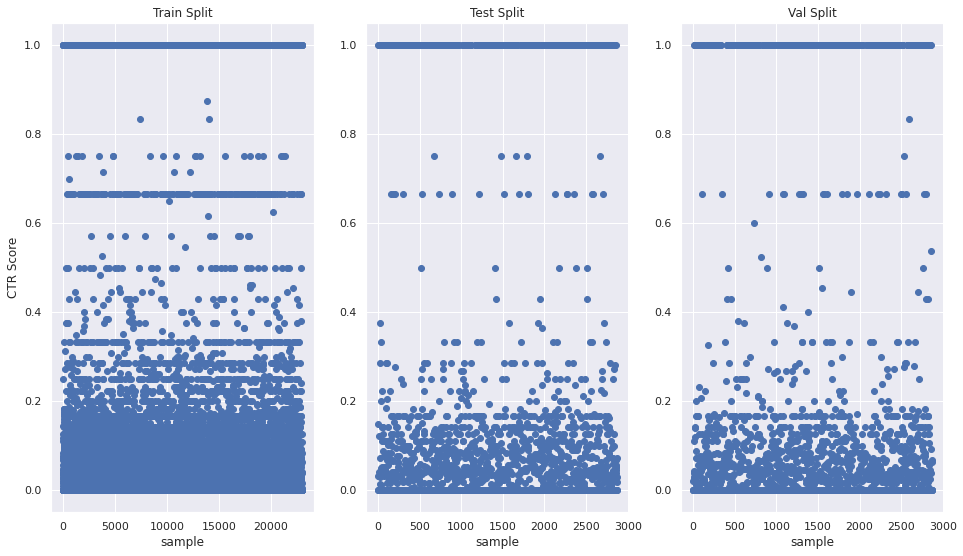

In [178]:
f, ax = plt.subplots(figsize=(16, 9))
plt.subplot(131), plt.title('Train Split'), plt.xlabel('sample'), plt.ylabel('CTR Score')
x_train = np.arange(0,len(X_train), 1)
plt.scatter(x_train, y_train)

plt.subplot(132), plt.title('Test Split'), plt.xlabel('sample')
x_test = np.arange(0,len(X_test), 1)
plt.scatter(x_test, y_test)

plt.subplot(133), plt.title('Val Split'), plt.xlabel('sample')
x_val = np.arange(0,len(X_val), 1)
plt.scatter(x_val, y_val)

# <font color='orange'>Training</font>

In [291]:
# DF to store metrics
results_df = pd.DataFrame(columns = ['model', 'mse', 'mae', 'r2'])

## <font color='green'>Training Helper Functions</font>

In [297]:
def get_results(regressor, X_val, y_val, name):
  '''
  Function to plot and get model performance over val set
  -----
  Args:
      regressor: Regressor model
      X_val: matrix that contains val features.
      y_val: Ground thruth with validation data.
      name: String to use as title when plotting.
  -----
  Return:
      results_dict: Dictionary with all metrics with the folliwing structure:
      {
        'mse': ,
        'mae': ,
        'r2':
      }
  '''

  # Len of validation data
  x_axis = np.arange(0, len(X_val), 1)
  # Preictions
  y_true = y_val
  y_pred = regressor.predict(X_val)

  # Plotting
  plt.subplots(figsize=(12,9))
  plt.scatter(x_axis, y_true, label = 'y_true')
  plt.scatter(x_axis, y_pred, label = 'y_pred')
  plt.title('Results '+ name), plt.xlabel('Sample'), plt.ylabel('CTR Score')
  plt.legend()

  # Obtaining results
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  r2  = r2_score(y_true, y_pred)

  results_dict = {'mse': mse,
                  'mae': mae,
                  'r2': r2}

  return results_dict

In [287]:
def add_result_df(results_df, results_dict, name):
  '''
  Funtion that adds results to summay dataframe
  ----
  Args:
       results_df: Summary dataframe containing model metrics.
       results_dict: Dictionary of results returend from `get_results` function.
       name: modelname to add in the summary dataframe.
  ----
  Return:
       results_df: Same summary dataframe with appended new values.
  '''
  
  results_df = results_df.append({'model': name,
                                  'mse': results_dict['mse'],
                                  'mae': results_dict['mae'],
                                  'r2':  results_dict['r2']}, ignore_index=True)
  
  return results_df

## <font color='green'>Decision Tree Classifier</font>

In [250]:
regressor_dt = DecisionTreeRegressor(criterion='squared_error')
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor()

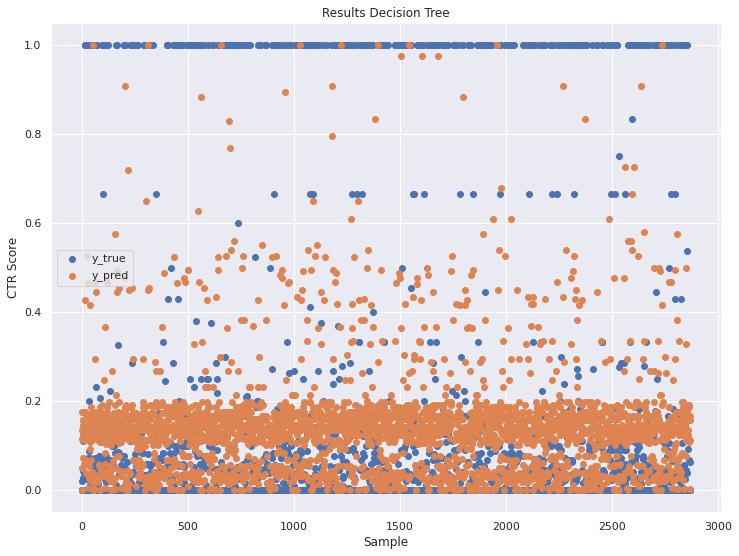

In [298]:
decision_tree_metrics = get_results(regressor_dt, X_val, y_val, name = 'Decision Tree')

In [292]:
results_df = add_result_df(results_df, decision_tree_metrics, 'decision_tree')
results_df

,model,mse,mae,r2
0,decision_tree,0.080045,0.175937,0.176982


## <font color='green'>Random Forest Classifier</font>

In [196]:
rf_regressor = RandomForestRegressor(n_estimators = 100)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

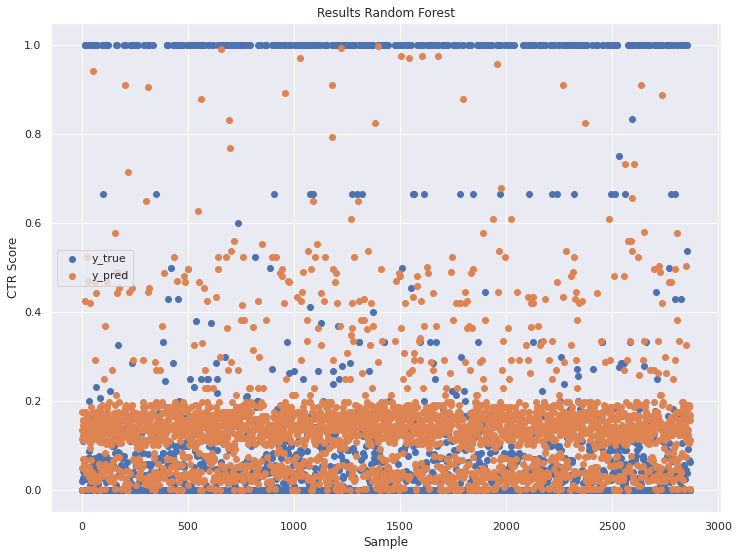

In [299]:
random_forest_metrics = get_results(rf_regressor, X_val, y_val, name = 'Random Forest')

In [294]:
results_df = add_result_df(results_df, random_forest_metrics, 'random_forest')
results_df

,model,mse,mae,r2
0,decision_tree,0.080045,0.175937,0.176982
1,random_forest,0.080011,0.176183,0.177332


## <font color='green'>SVR</font>

In [199]:
svr_regressor = SVR(C=1.0, epsilon=0.2)
svr_regressor.fit(X_train, y_train)

SVR(epsilon=0.2)

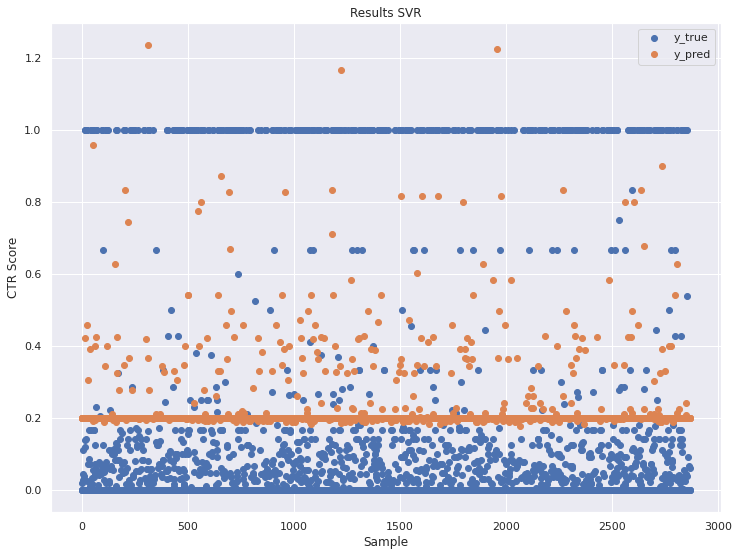

In [300]:
svr_metrics = get_results(svr_regressor, X_val, y_val, name = 'SVR')

In [296]:
results_df = add_result_df(results_df, svr_metrics, 'svr')
results_df

,model,mse,mae,r2
0,decision_tree,0.080045,0.175937,0.176982
1,random_forest,0.080011,0.176183,0.177332
2,svr,0.091327,0.237525,0.060980


## <font color='green'>Gradient Boosting</font>

In [204]:
gb_regressor = GradientBoostingRegressor(random_state=0)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

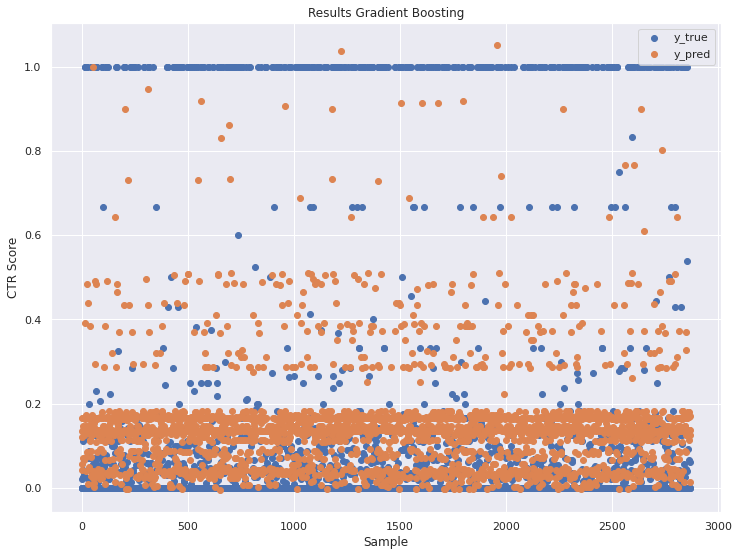

In [301]:
gradient_metrics = get_results(gb_regressor, X_val, y_val, name = 'Gradient Boosting')

In [ ]:
results_df = add_result_df(results_df, gradient_metrics, 'gradient_boosting')
results_df

In [303]:
results_df.to_excel('results_full_training.xlsx')

## <font color='green'>Multi-layer Perceptron</font>

In [ ]:
BATCH_SIZE = 32
LR = 1e-4

def MLP_model(input_shape = X_train.shape[1]):

  input = tf.keras.layers.Input(shape=(input_shape))
  x = tf.keras.layers.Dense(256, activation="relu")(input)
  x = tf.keras.layers.Dense(128, activation="relu")(x)
  x = tf.keras.layers.Dense(64, activation="relu")(x)
  x = tf.keras.layers.Dense(32, activation="linear")(x)
  x = tf.keras.layers.Dense(1)(x)
  
  model = tf.keras.Model(inputs = input, outputs = x)

  model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
                  metrics=['mse', 'mae',tf.keras.metrics.RootMeanSquaredError(name = 'rmse')])
  return model


MLP_regressor = MLP_model()
history = MLP_regressor.fit(X_train, y_train,
                        validation_data = [X_val, y_val],
                        epochs=100,verbose=1)

In [246]:
MLP_regressor.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_112 (Dense)           (None, 256)               1792      
                                                                 
 dense_113 (Dense)           (None, 128)               32896     
                                                                 
 dense_114 (Dense)           (None, 64)                8256      
                                                                 
 dense_115 (Dense)           (None, 32)                2080      
                                                                 
 dense_116 (Dense)           (None, 1)                 33        
                                                                 
Total params: 45,057
Trainable params: 45,057
Non-trainable

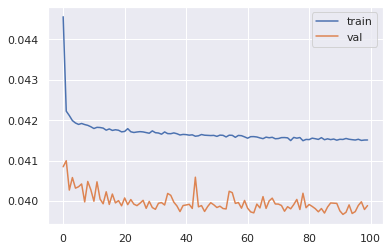

In [244]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.legend()

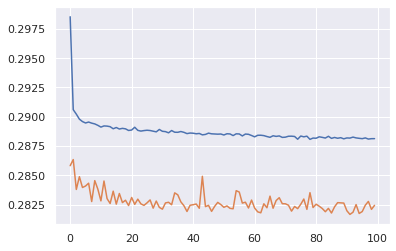

In [242]:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])

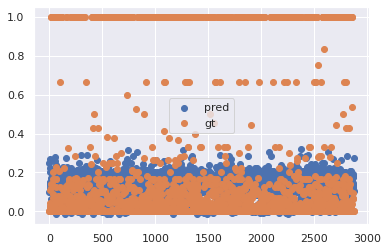

In [214]:
to_use = X_val
x = np.arange(0,len(to_use), 1)
plt.scatter(x, MLP_model.predict(to_use), label = 'pred')
plt.scatter(x, y_val, label= 'gt')
plt.legend()

# <font color='orange'>Training Fine Tuning</font>

In [307]:
results_df_fine_tuning = pd.DataFrame(columns = ['model', 'mse', 'mae', 'r2'])

## <font color='green'>Decision Tree</font>

In [ ]:
# Hyperparameters Decision Tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']

randomGrid_dt = {'criterion': criterion,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_depth': max_depth
              }

regressor_dt = DecisionTreeRegressor(criterion='squared_error')
decision_t_random = RandomizedSearchCV(estimator = regressor_dt, param_distributions=randomGrid_dt,
                    n_iter = 100, verbose = 2)

decision_t_random.fit(X_train, y_train)

In [309]:
decision_t_random.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=70,
                      min_samples_leaf=4)

Training using best estimator found

In [314]:
regressor_dt = DecisionTreeRegressor(criterion='friedman_mse', max_depth=70, min_samples_leaf=4)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=70,
                      min_samples_leaf=4)

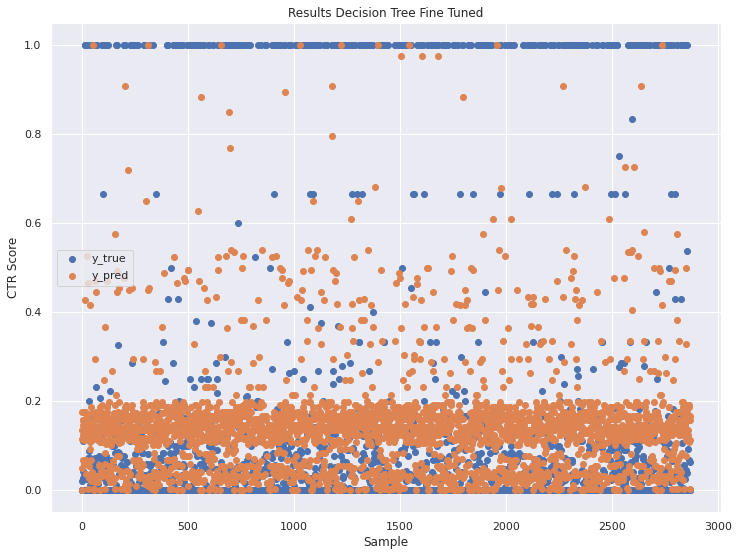

In [315]:
decision_tree_ft_metrics = get_results(regressor_dt, X_val, y_val, name = 'Decision Tree Fine Tuned')

In [317]:
results_df = add_result_df(results_df, decision_tree_ft_metrics, 'ft_fine_tuned')

In [318]:
results_df

,model,mse,mae,r2
0,decision_tree,0.080045,0.175937,0.176982
1,random_forest,0.080011,0.176183,0.177332
2,svr,0.091327,0.237525,0.060980
3,gradient_boosting,0.079365,0.176610,0.183975
4,dt_fine_tuned,0.079779,0.175736,0.179718


In [ ]:
results_df.to_excel('results_full_training.xlsx')

## <font color='green'>Gradient Boosting</font>

In [ ]:
# Hyperparameters Gradient Boosting
loss = ['squared_error', 'absolute_error', 'huber', 'quantile']
learning_rate = [x for x in np.linspace(1e-5, 1e-2, num = 11)]
n_estimators = [int(x) for x in np.linspace(200, 2000, 5)]

randomGrid_gb = {'loss': loss,
              'learning_rate': learning_rate,
              'n_estimators': n_estimators
              }
            
gb_regressor = GradientBoostingRegressor()

gb_regressor_random = RandomizedSearchCV(estimator = gb_regressor, param_distributions=randomGrid_gb,
                               n_iter = 50, verbose = 2)

gb_regressor_random.fit(X_train, y_train)

In [327]:
gb_regressor_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.004006, n_estimators=1550)

In [328]:
gb_regressor = GradientBoostingRegressor(learning_rate = 0.004006,
                                         n_estimators = 1550)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.004006, n_estimators=1550)

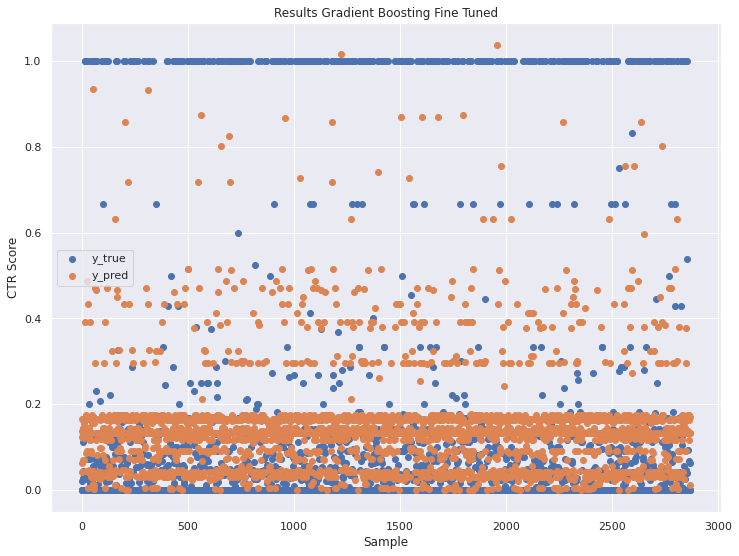

In [329]:
gradient_ft_metrics = get_results(gb_regressor, X_val, y_val, name = 'Gradient Boosting Fine Tuned')

In [330]:
results_df = add_result_df(results_df, gradient_ft_metrics, 'ft_gradient_boosting')
results_df

,model,mse,mae,r2
0,decision_tree,0.080045,0.175937,0.176982
1,random_forest,0.080011,0.176183,0.177332
2,svr,0.091327,0.237525,0.060980
3,gradient_boosting,0.079365,0.176610,0.183975
4,dt_fine_tuned,0.079779,0.175736,0.179718
5,ft_gradient_boosting,0.079413,0.177140,0.183482


## <font color='green'>Random Forest</font>

In [ ]:
# Hyperparameters Random Forest

n_estimators = [1550]# [int(x) for x in np.linspace(200, 2000, 2)] #5
criterion = ['squared_error', 'absolute_error', 'poisson']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)] # 5
max_depth.append(None)
max_features = ['auto', 'log2', 'sqrt']
randomGrid_rf = {
                 'n_estimators': n_estimators,
                 'criterion': criterion,
                 'max_depth': max_depth,
                 'max_features': max_features
              }          

rf_regressor = RandomForestRegressor()

rf_regressor_random = RandomizedSearchCV(estimator = rf_regressor, param_distributions=randomGrid_rf,
                               n_iter = 50, verbose = 2)

rf_regressor_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=squared_error, max_depth=35, max_features=sqrt, n_estimators=1550; total time=   9.1s
[CV] END criterion=squared_error, max_depth=35, max_features=sqrt, n_estimators=1550; total time=   9.1s
[CV] END criterion=squared_error, max_depth=35, max_features=sqrt, n_estimators=1550; total time=   9.0s
[CV] END criterion=squared_error, max_depth=35, max_features=sqrt, n_estimators=1550; total time=   9.0s
[CV] END criterion=squared_error, max_depth=35, max_features=sqrt, n_estimators=1550; total time=   9.0s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, n_estimators=1550; total time=   8.4s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, n_estimators=1550; total time=   8.4s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, n_estimators=1550; total time=   8.5s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, n_estimators=1550; total time= 

# Feature Importance

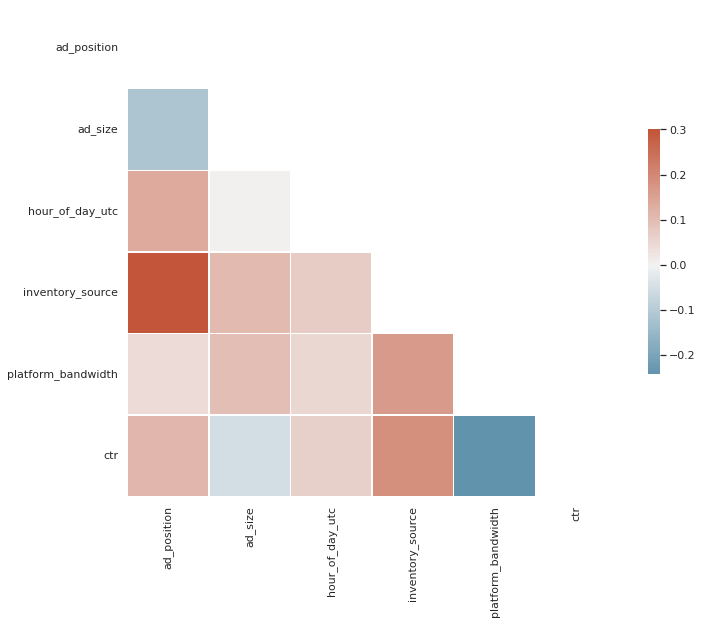

In [505]:
sns.set_theme(style="white")

model_corr = ctr_encoded_df.drop(columns = ['environment_type']).corr()

f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(model_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(model_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})